# Dive into promiscuity cliffs

I was exited about  the concept of ‘promiscuity cliffs’, but I'm curious about the mechanism of it in terms of Molecular recognition.
Similarity search for Protein Data Bank was conducted to get Complex structures of Protein and promiscuity cliff compound. 

[Identification and analysis of promiscuity cliffs formed by bioactive compounds and experimental implications](http://pubs.rsc.org/en/content/articlehtml/2017/ra/c6ra27247a)


In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from IPython.display import HTML, display

## Download PDB ligands from Ligand Expo

[Ligand expo](http://ligand-expo.rcsb.org/ld-download.html)

In [2]:
!wget http://ligand-expo.rcsb.org/dictionaries/Components-pub.sdf.gz
!gunzip Components-pub.sdf.gz

--2017-11-17 20:54:59--  http://ligand-expo.rcsb.org/dictionaries/Components-pub.sdf.gz
Resolving ligand-expo.rcsb.org... 128.6.150.17
Connecting to ligand-expo.rcsb.org|128.6.150.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14881209 (14M) [application/x-gzip]
Saving to: 'Components-pub.sdf.gz'

Components-pub.sdf. 100%[===================>]  14.19M  1.20MB/s    in 13s     

2017-11-17 20:55:13 (1.09 MB/s) - 'Components-pub.sdf.gz' saved [14881209/14881209]



## Create molecule objects and fingerprints

In [3]:
mols = [mol for mol in Chem.SDMolSupplier("Components-pub.sdf") if mol is not None]

RDKit ERROR: [20:55:25] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [20:55:25] ERROR: Could not sanitize molecule ending on line 27727
RDKit ERROR: [20:55:25] ERROR: Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [20:55:25] Explicit valence for atom # 51 O, 3, is greater than permitted
RDKit ERROR: [20:55:25] ERROR: Could not sanitize molecule ending on line 51478
RDKit ERROR: [20:55:25] ERROR: Explicit valence for atom # 51 O, 3, is greater than permitted
RDKit ERROR: [20:55:25] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 90 in file /Users/glandrum/anaconda/conda-bld/rdkit_1499404988161/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [20:55:25] Unexpected error hit on line 72180
RDKit ERROR: [20:55:25] ERROR: moving to the begining of the next molecule
R

RDKit ERROR: [20:55:27] ERROR: Explicit valence for atom # 5 B, 6, is greater than permitted
RDKit ERROR: [20:55:27] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [20:55:27] ERROR: Could not sanitize molecule ending on line 347087
RDKit ERROR: [20:55:27] ERROR: Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [20:55:28] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [20:55:28] ERROR: Could not sanitize molecule ending on line 361666
RDKit ERROR: [20:55:28] ERROR: Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [20:55:28] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [20:55:28] ERROR: Could not sanitize molecule ending on line 361756
RDKit ERROR: [20:55:28] ERROR: Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [20:55:28] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [20:55:28] ERROR: Could not 

RDKit ERROR: [20:55:31] ERROR: Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [20:55:31] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [20:55:31] ERROR: Could not sanitize molecule ending on line 746157
RDKit ERROR: [20:55:31] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [20:55:31] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [20:55:31] ERROR: Could not sanitize molecule ending on line 746329
RDKit ERROR: [20:55:31] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [20:55:31] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [20:55:31] ERROR: Could not sanitize molecule ending on line 762574
RDKit ERROR: [20:55:31] ERROR: Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [20:55:31] Explicit valence for atom # 0 Na, 3, is greater than permitted
RDKit ERROR: [20:55:31] ERROR: Cou

RDKit ERROR: [20:55:32] ERROR: Could not sanitize molecule ending on line 893915
RDKit ERROR: [20:55:32] ERROR: Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [20:55:32] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [20:55:32] ERROR: Could not sanitize molecule ending on line 894071
RDKit ERROR: [20:55:32] ERROR: Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [20:55:32] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:55:32] ERROR: Could not sanitize molecule ending on line 894720
RDKit ERROR: [20:55:32] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:55:32] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [20:55:32] ERROR: Could not sanitize molecule ending on line 895058
RDKit ERROR: [20:55:32] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [20:55:32] Explicit valence for a

RDKit ERROR: [20:55:35] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [20:55:35] ERROR: Could not sanitize molecule ending on line 1218930
RDKit ERROR: [20:55:35] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [20:55:35] Explicit valence for atom # 17 N, 6, is greater than permitted
RDKit ERROR: [20:55:35] ERROR: Could not sanitize molecule ending on line 1229614
RDKit ERROR: [20:55:35] ERROR: Explicit valence for atom # 17 N, 6, is greater than permitted
RDKit ERROR: [20:55:35] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [20:55:35] ERROR: Could not sanitize molecule ending on line 1231629
RDKit ERROR: [20:55:35] ERROR: Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [20:55:35] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [20:55:35] ERROR: Could not sanitize molecule ending on line 1234594
RDKit ERROR: [20:55:35] ERROR: Explicit valenc

RDKit ERROR: [20:55:37] ERROR: Explicit valence for atom # 0 Ca, 8, is greater than permitted
RDKit ERROR: [20:55:37] Explicit valence for atom # 0 Ca, 9, is greater than permitted
RDKit ERROR: [20:55:37] ERROR: Could not sanitize molecule ending on line 1401602
RDKit ERROR: [20:55:37] ERROR: Explicit valence for atom # 0 Ca, 9, is greater than permitted
RDKit ERROR: [20:55:37] Explicit valence for atom # 0 Ca, 10, is greater than permitted
RDKit ERROR: [20:55:37] ERROR: Could not sanitize molecule ending on line 1401658
RDKit ERROR: [20:55:37] ERROR: Explicit valence for atom # 0 Ca, 10, is greater than permitted
RDKit ERROR: [20:55:37] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [20:55:37] ERROR: Could not sanitize molecule ending on line 1404279
RDKit ERROR: [20:55:37] ERROR: Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [20:55:37] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [20:55:37] ERROR: 

RDKit ERROR: [20:55:41] ERROR: Could not sanitize molecule ending on line 1811079
RDKit ERROR: [20:55:41] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:55:41] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [20:55:41] ERROR: Could not sanitize molecule ending on line 1829212
RDKit ERROR: [20:55:41] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [20:55:41] Explicit valence for atom # 0 Be, 4, is greater than permitted
RDKit ERROR: [20:55:41] ERROR: Could not sanitize molecule ending on line 1830222
RDKit ERROR: [20:55:41] ERROR: Explicit valence for atom # 0 Be, 4, is greater than permitted
RDKit ERROR: [20:55:41] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [20:55:41] ERROR: Could not sanitize molecule ending on line 1838348
RDKit ERROR: [20:55:41] ERROR: Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [20:55:41] Explicit valen

RDKit ERROR: [20:55:42] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [20:55:43] Explicit valence for atom # 29 N, 4, is greater than permitted
RDKit ERROR: [20:55:43] ERROR: Could not sanitize molecule ending on line 2037389
RDKit ERROR: [20:55:43] ERROR: Explicit valence for atom # 29 N, 4, is greater than permitted
RDKit ERROR: [20:55:43] Explicit valence for atom # 13 N, 4, is greater than permitted
RDKit ERROR: [20:55:43] ERROR: Could not sanitize molecule ending on line 2042912
RDKit ERROR: [20:55:43] ERROR: Explicit valence for atom # 13 N, 4, is greater than permitted
RDKit ERROR: [20:55:43] Explicit valence for atom # 36 O, 3, is greater than permitted
RDKit ERROR: [20:55:43] ERROR: Could not sanitize molecule ending on line 2062777
RDKit ERROR: [20:55:43] ERROR: Explicit valence for atom # 36 O, 3, is greater than permitted
RDKit ERROR: [20:55:43] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [20:55:43] ERROR: C

In [4]:
fps = []
for m in mols:
    fp = AllChem.GetMorganFingerprint(m, 2, useFeatures=True)
    fps.append(fp)

In [5]:
len(fps), len(mols)

(25156, 25156)

## Get promiscuity cliffs data

In [6]:
!wget https://zenodo.org/record/200393/files/784_Promiscuity_Cliffs.txt

--2017-11-17 20:56:36--  https://zenodo.org/record/200393/files/784_Promiscuity_Cliffs.txt
Resolving zenodo.org... 188.184.65.20
Connecting to zenodo.org|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247495 (242K) [text/plain]
Saving to: '784_Promiscuity_Cliffs.txt'

784_Promiscuity_Cli 100%[===================>] 241.69K   157KB/s    in 1.5s    

2017-11-17 20:56:40 (157 KB/s) - '784_Promiscuity_Cliffs.txt' saved [247495/247495]



In [7]:
df = pd.read_table("784_Promiscuity_Cliffs.txt")

make list of unique smiles

In [8]:
HP_smiles = list(set(list(df["CPD_1_SMILES"])))

In [9]:
pairs = []
legends = []

for smi in HP_smiles:
    m = Chem.MolFromSmiles(smi)
    qfp = AllChem.GetMorganFingerprint(m, 2, useFeatures=True)
    max_sim = 0.0
    maxi = 0
    for i, dfp in enumerate(fps):
        sim = DataStructs.TanimotoSimilarity(qfp, dfp)
        if sim > max_sim:
            max_sim = sim
            maxi = i
    if max_sim > 0.8:
        display(HTML('<a href="http://www4.rcsb.org/ligand/{0}">{0}</a> {1} {2}'.format(mols[maxi].GetProp("_Name"), max_sim, smi)))
        pairs.append(m)
        AllChem.Compute2DCoords(mols[maxi])
        pairs.append(mols[maxi])
        legends.append(smi)
        legends.append("{:2.1f}%".format(max_sim*100))

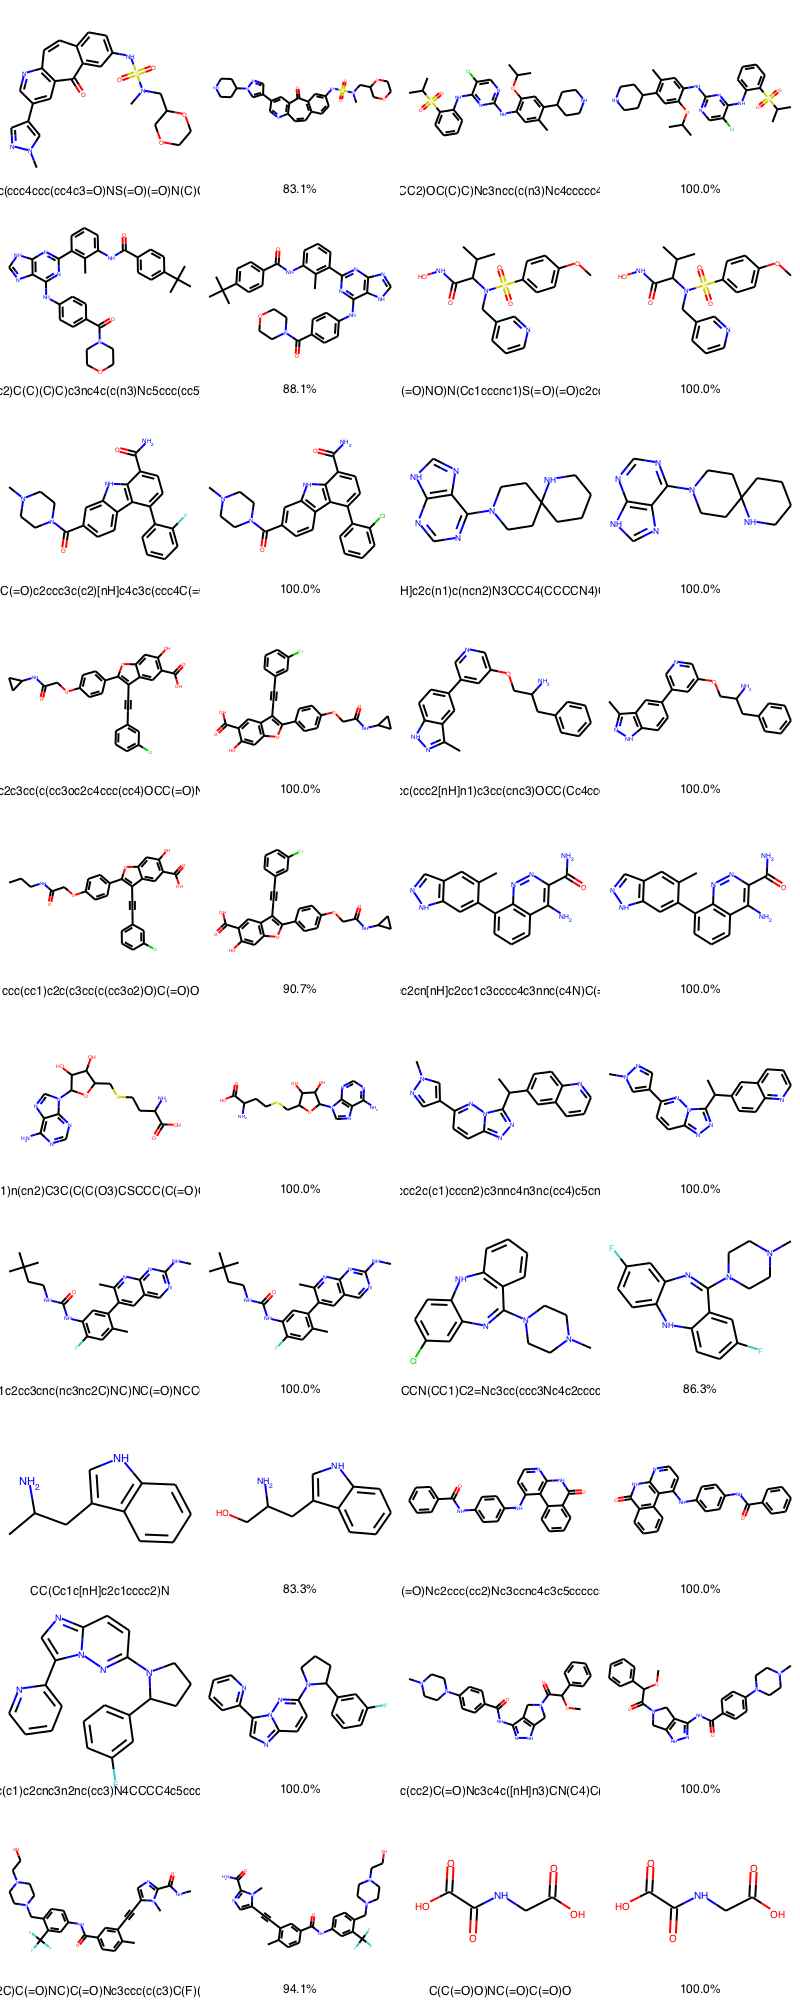

In [11]:
Draw.MolsToGridImage(pairs, molsPerRow=4, legends=legends)